# Plotting 

This notebook gives some examples of how to use Python for creating plot and styling plots.

## Packages and libraries

The packages that are used in this notebook are: 

    - matplotlib
    - numpy
    - pandas
    - seaborn
    - testyles

In [7]:
# Start by importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Create a dataframe with some data, in this example, i'll load the air passenger data from
# the example_data file.

df = pd.read_csv('../example_data/air_passengers.csv',)
        
# In a notebook, if the last line is a variable, it will be printed out in the output cell.
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


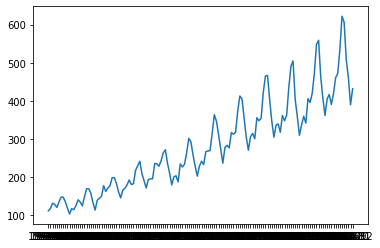

In [10]:
# Creating a basic plot with matplotlib is very easy.

# Simply call the plot function on plt, and pass it the x and y data.
plt.plot(df['Month'], df['#Passengers'])

# Call plt.show() to display the plot.
plt.show()

# Here we have the data plotted, however it doesn't look great, and there are plenty of things we can do to make it look better. 

In [13]:
# The first thing we can do is to modify the pandas dataframe to tell it that we want the Month 
# columns to be treated as a date column.

# Here we saying set the Month column to be the result of converting the month column to a datetime object.
df['Month'] = pd.to_datetime(df['Month'])

# Let's see what that looks like, you'll notice  that Pandas can automaticaly read the input
# and determine what datae that is. However, this isn't always possible.
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


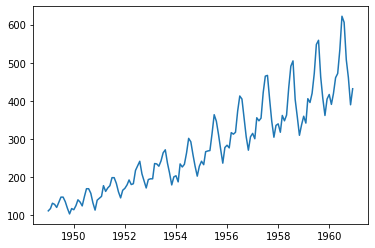

In [14]:
# Now lets do the same plot again and take a look at the result.

plt.plot(df['Month'], df['#Passengers'])

# Call plt.show() to display the plot.
plt.show()

# Now, matplotlib know the month column is a date column, and it will treat it as such. And it will automatically
# choose the best way to plot the data. We can edit this if necessary, but for now, let go with this. 

## Creating a bar chart

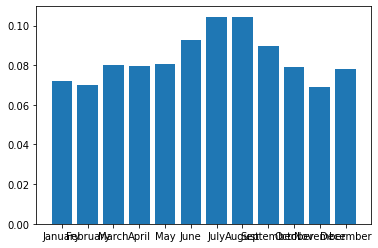

In [73]:
# Now say we want to look at how the number of passengers varies between months. 
# We can edit our dataframe to tell pandas that we want to group the data by the month column.

# First lets create a new columns with the name of the month.
df['Month number'] = df['Month'].dt.month
df['Month name'] = df['Month'].dt.month_name()

# Next, groupby the month name column.
df_grouped = df.groupby(by=['Month number', 'Month name']).agg({'#Passengers':'sum'})

# Now, we can get each month as a proportion of the total number of passengers.
df_grouped['%Passengers'] = df_grouped['#Passengers'] / df_grouped['#Passengers'].sum()


# Let's create a horizontal bar char to show the proportion of passengers for each month.
plt.bar(df_grouped.index.get_level_values('Month name'), df_grouped['%Passengers'])

plt.show()

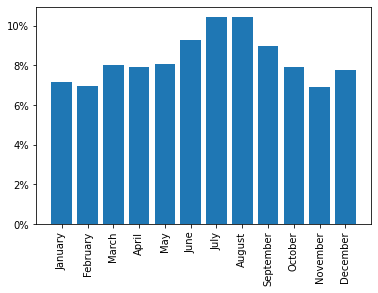

In [83]:
# Again, this doesn't look great, but we can do a lot more with this.

# First lets format the y axis to be a percentage.
# To do this, we need to import the tick formatter form matplotlib.ticker.

from matplotlib.ticker import PercentFormatter

# We create the plot here.
plt.bar(df_grouped.index.get_level_values(
    'Month name'), df_grouped['%Passengers'])

# Format the axes.
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))


# Also, lets rotate the x axis labels so they aren't overlapping.
plt.xticks(rotation=90)

plt.show()

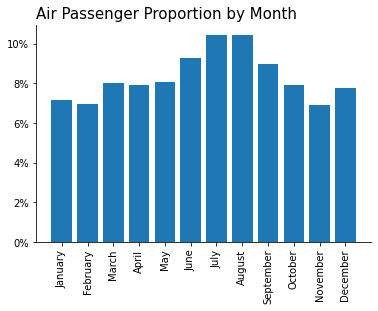

In [90]:
# Finally, let's remove the spines and add a title.

# We create the plot here.
plt.bar(df_grouped.index.get_level_values(
    'Month name'), df_grouped['%Passengers'])

# Format the axes.
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))


# Also, lets rotate the x axis labels so they aren't overlapping.
plt.xticks(rotation=90)

# Remove the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set a title
plt.title('Air Passenger Proportion by Month', loc='left', fontsize=15)

plt.show()



# Using TE Styles

Doing all this work to styles charts, while sometimes useful, can become annoying. I have created a downloadable pacakge called [TE Styles](https://pypi.org/project/teplotstyles/) that can be used to create styles for charts in the format we use in Excel.


To install it, just type
```
pip install teplotstyles
```

into your command line.


In [92]:
# to use te plot function, we need to import the plotting module.
from testyles import styles

# Then initialize the styles.
styles.init_styles()

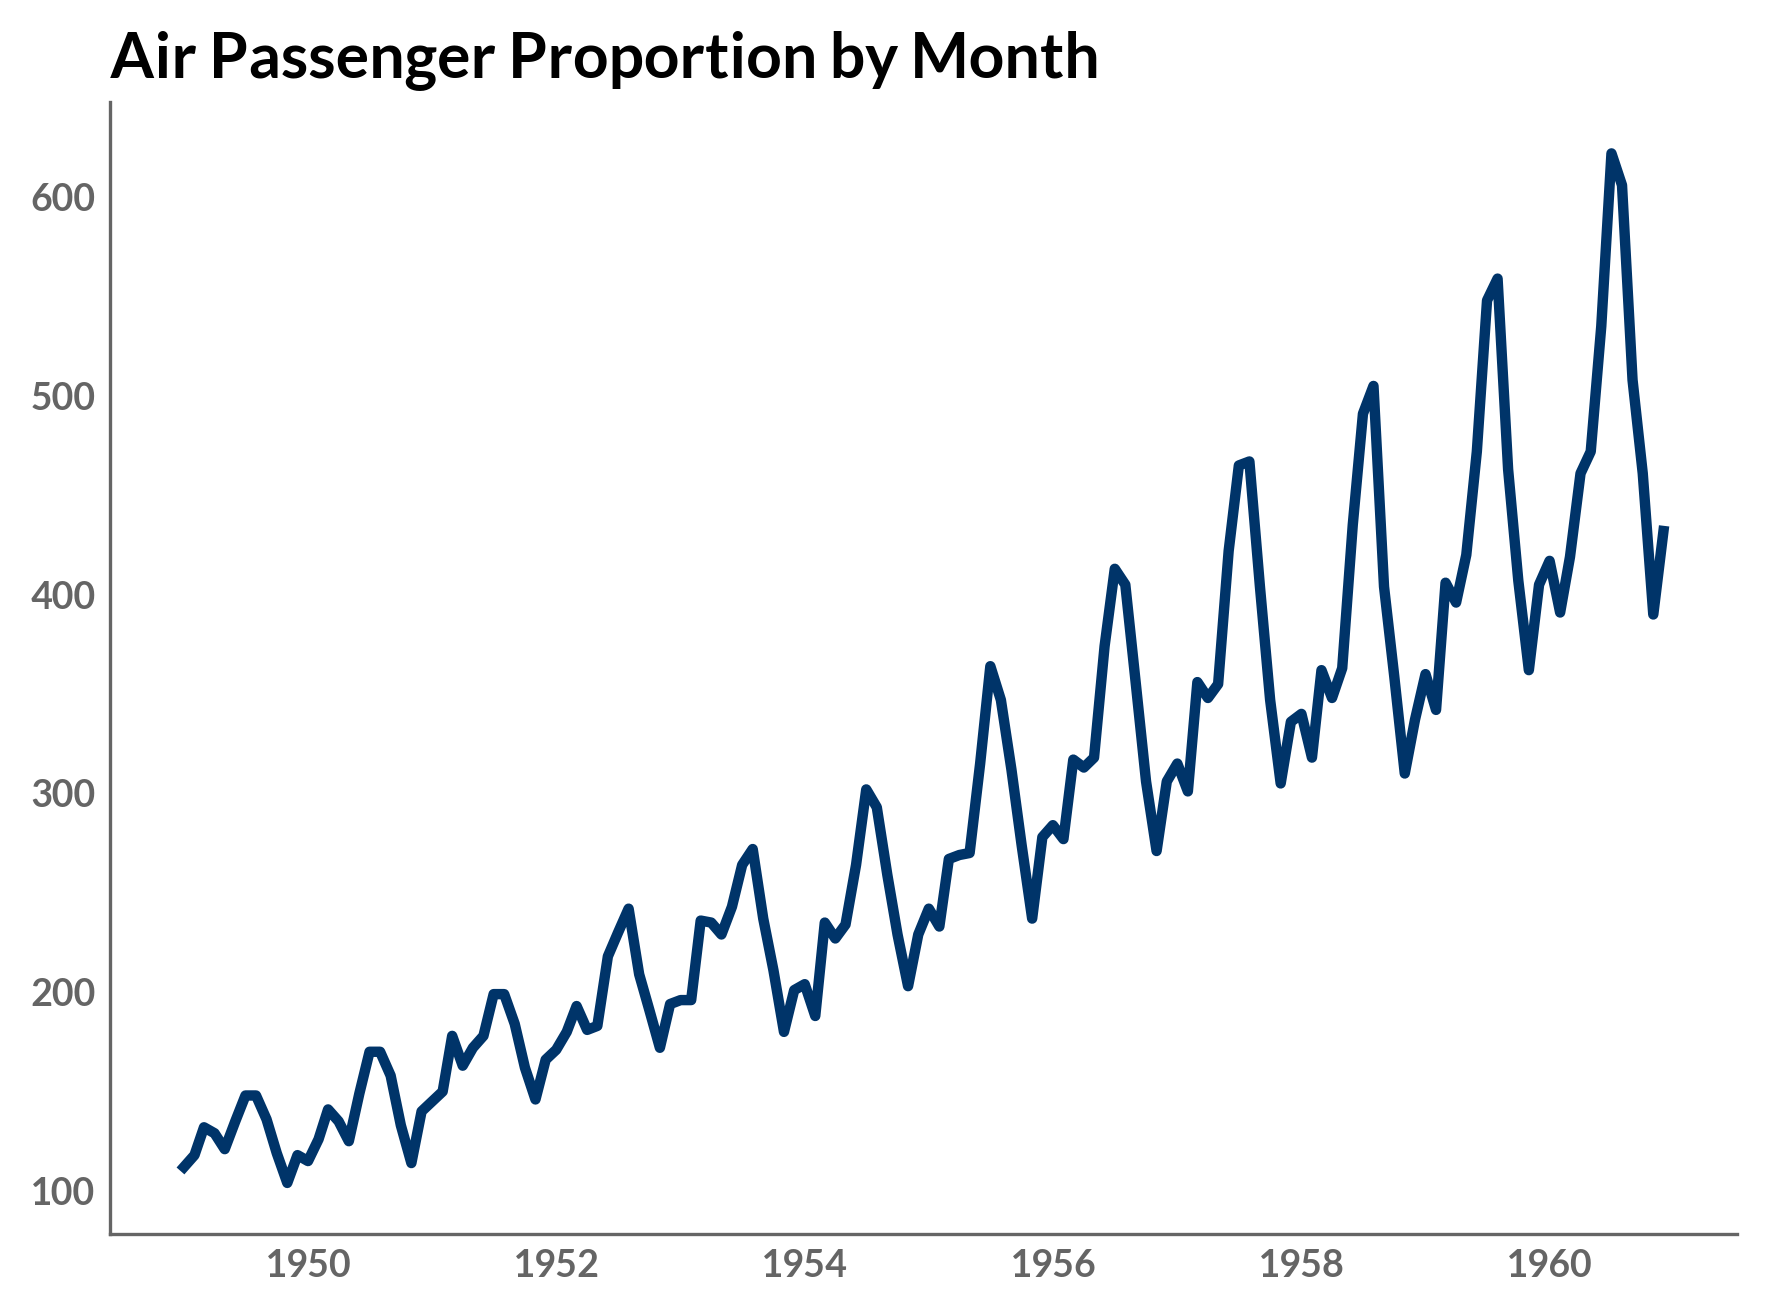

In [97]:
# Now when we plot...
plt.plot(df['Month'], df['#Passengers'])

plt.title('Air Passenger Proportion by Month', loc='left', fontsize=15)

plt.show()